# SALARY PREDICTION 

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
df=pd.read_csv('Salary Data.csv')

In [17]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


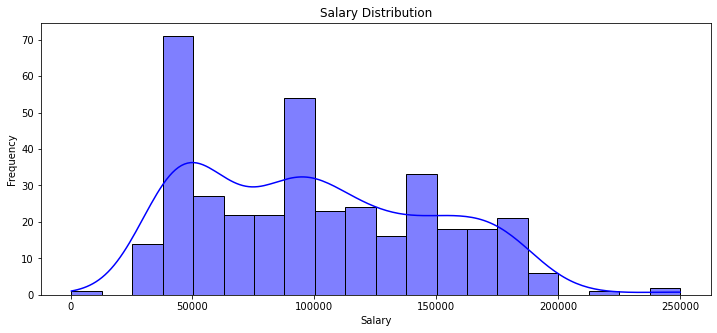

In [18]:
# Step 3: Data visualization (distribution and relationships)
plt.figure(figsize=(12, 5))
sns.histplot(df['Salary'], kde=True, bins=20, color='blue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

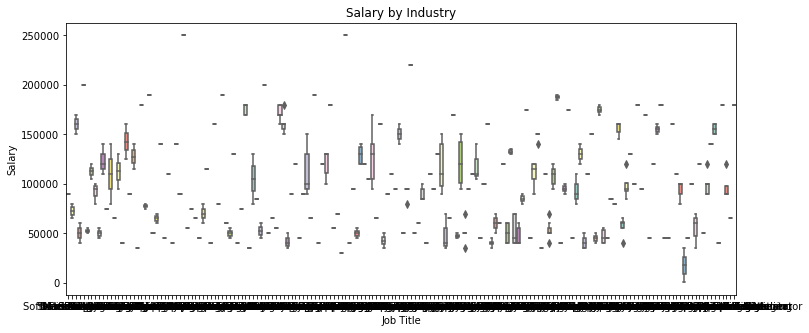

In [19]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Job Title', y='Salary', data=df, palette='Set3')
plt.title("Salary by Industry")
plt.show()

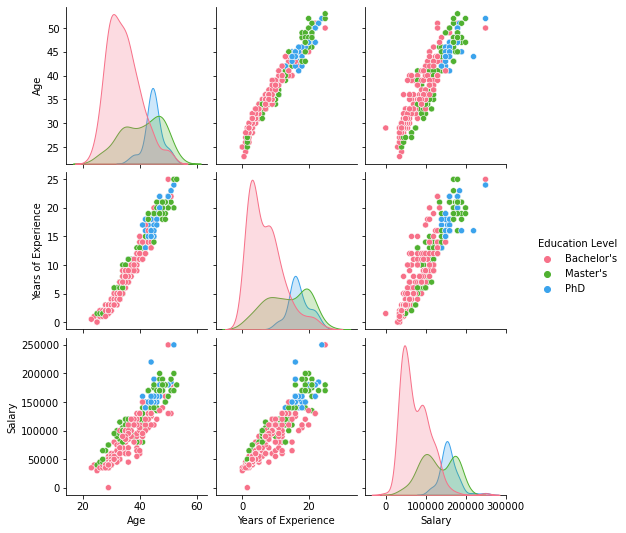

In [20]:
sns.pairplot(df, hue='Education Level', palette='husl')
plt.show()

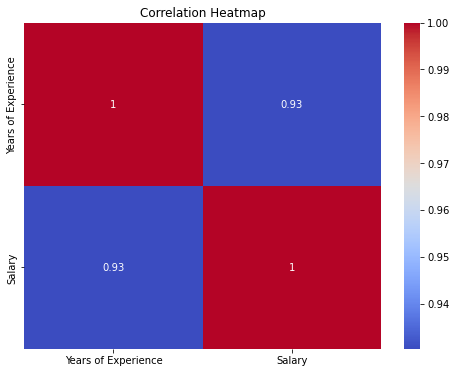

In [21]:
# Step 4: Correlation heatmap for numeric features
correlation_matrix = df[['Years of Experience', 'Salary']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:

# Step 5: Define features and target variable
X = df[['Years of Experience', 'Education Level', 'Job Title', 'Gender']]
y = df['Salary']


In [23]:
# Step 6: Preprocess data
categorical_features = ['Education Level', 'Job Title', 'Gender']
numeric_features = ['Years of Experience']

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

In [24]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)




In [25]:
# Step 8: Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Step 9: Make predictions
y_pred = model.predict(X_test)

# Step 10: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 345006575.95
R² Score: 0.86


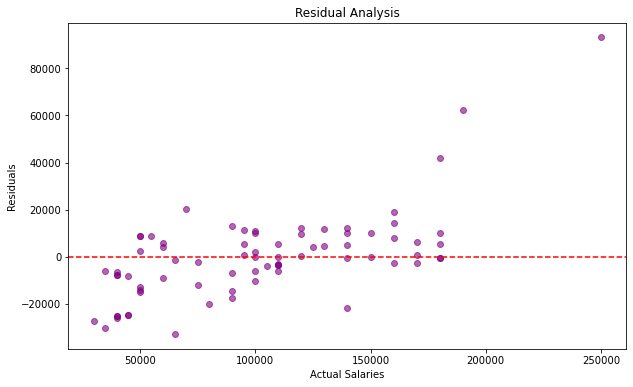

In [27]:
# Step 11: Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Analysis")
plt.xlabel("Actual Salaries")
plt.ylabel("Residuals")
plt.show()

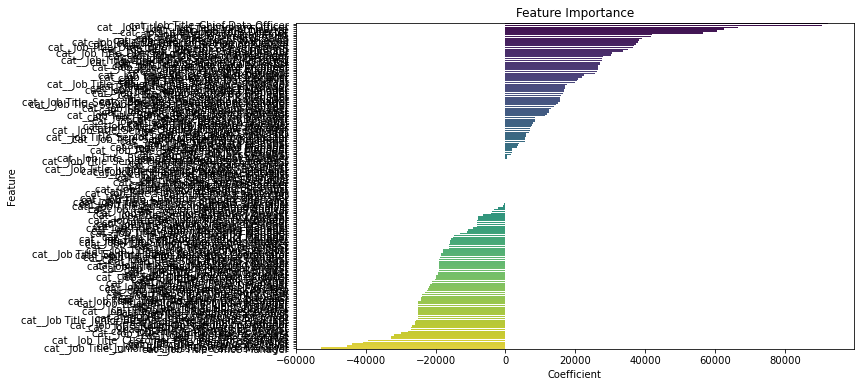

In [28]:
# Step 12: Feature importance
feature_names = column_transformer.get_feature_names_out()
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title("Feature Importance")
plt.show()
